In [77]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [78]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [79]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [80]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [81]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7435,1691184600,1.10184,1.10189,1.10082,1.10087,1995,8,0
7436,1691186400,1.10088,1.10105,1.10060,1.10079,1532,8,0
7437,1691188200,1.10079,1.10083,1.10034,1.10073,1335,8,0
7438,1691190000,1.10073,1.10076,1.10036,1.10071,814,8,0


In [82]:


fibonacciPeriods = [5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

for period in fibonacciPeriods:
    df[f'ema-high-{period}'] = ta.ema(df['high'], length=period)

for period in fibonacciPeriods:
    df[f'ema-low-{period}'] = ta.ema(df['low'], length=period)






In [83]:




for i in range(len(df)):
    df['highEmaTotal'] = df['ema-high-5'] + df['ema-high-8'] + df['ema-high-13'] + df['ema-high-21'] + df['ema-high-34'] + df['ema-high-55'] + df['ema-high-89'] + df['ema-high-144'] + df['ema-high-233'] + df['ema-high-377'] + df['ema-high-610'] + df['ema-high-987'] + df['ema-high-1597'] + df['ema-high-2584'] + df['ema-high-4181']
    df['highEmaTotalAvg'] = df['highEmaTotal'] / len(fibonacciPeriods)
    df['lowEmaTotal'] = df['ema-low-5'] + df['ema-low-8'] + df['ema-low-13'] + df['ema-low-21'] + df['ema-low-34'] + df['ema-low-55'] + df['ema-low-89'] + df['ema-low-144'] + df['ema-low-233'] + df['ema-low-377'] + df['ema-low-610'] + df['ema-low-987'] + df['ema-low-1597'] + df['ema-low-2584'] + df['ema-low-4181']
    df['lowEmaTotalAvg'] = df['lowEmaTotal'] / len(fibonacciPeriods)






In [84]:


df = df.dropna()
df




,time,open,high,low,close,tick_volume,spread,real_volume,ema-high-5,ema-high-8,...,ema-low-377,ema-low-610,ema-low-987,ema-low-1597,ema-low-2584,ema-low-4181,highEmaTotal,highEmaTotalAvg,lowEmaTotal,lowEmaTotalAvg
4180,1683079200,1.10059,1.10132,1.10045,1.10106,962,9,0,1.100718,1.100547,...,1.099221,1.098058,1.095233,1.090814,1.086747,1.078488,16.454654,1.096977,16.441535,1.096102
4181,1683081000,1.10106,1.10135,1.10094,1.10105,744,9,0,1.100929,1.100725,...,1.099230,1.098068,1.095244,1.090827,1.086758,1.078499,16.455638,1.097043,16.442717,1.096181
4182,1683082800,1.10104,1.10126,1.10046,1.10120,1202,9,0,1.101039,1.100844,...,1.099236,1.098075,1.095255,1.090839,1.086769,1.078509,16.456383,1.097092,16.443266,1.096218
4183,1683084600,1.10120,1.10201,1.10118,1.10171,1259,9,0,1.101363,1.101103,...,1.099246,1.098086,1.095267,1.090852,1.086780,1.078520,16.457733,1.097182,16.444446,1.096296
4184,1683086400,1.10171,1.10191,1.10126,1.10186,1111,9,0,1.101545,1.101282,...,1.099257,1.098096,1.095279,1.090865,1.086791,1.078531,16.458765,1.097251,16.445523,1.096368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1691184600,1.10184,1.10189,1.10082,1.10087,1995,8,0,1.102848,1.102739,...,1.099467,1.101510,1.101778,1.099771,1.096462,1.091657,16.495208,1.099681,16.479056,1.098604
7436,1691186400,1.10088,1.10105,1.10060,1.10079,1532,8,0,1.102249,1.102364,...,1.099473,1.101507,1.101776,1.099772,1.096465,1.091661,16.494488,1.099633,16.478995,1.098600
7437,1691188200,1.10079,1.10083,1.10034,1.10073,1335,8,0,1.101776,1.102023,...,1.099478,1.101503,1.101773,1.099773,1.096468,1.091665,16.493849,1.099590,16.478849,1.098590
7438,1691190000,1.10073,1.10076,1.10036,1.10071,814,8,0,1.101437,1.101742,...,1.099483,1.101499,1.101770,1.099774,1.096471,1.091669,16.493388,1.099559,16.478877,1.098592


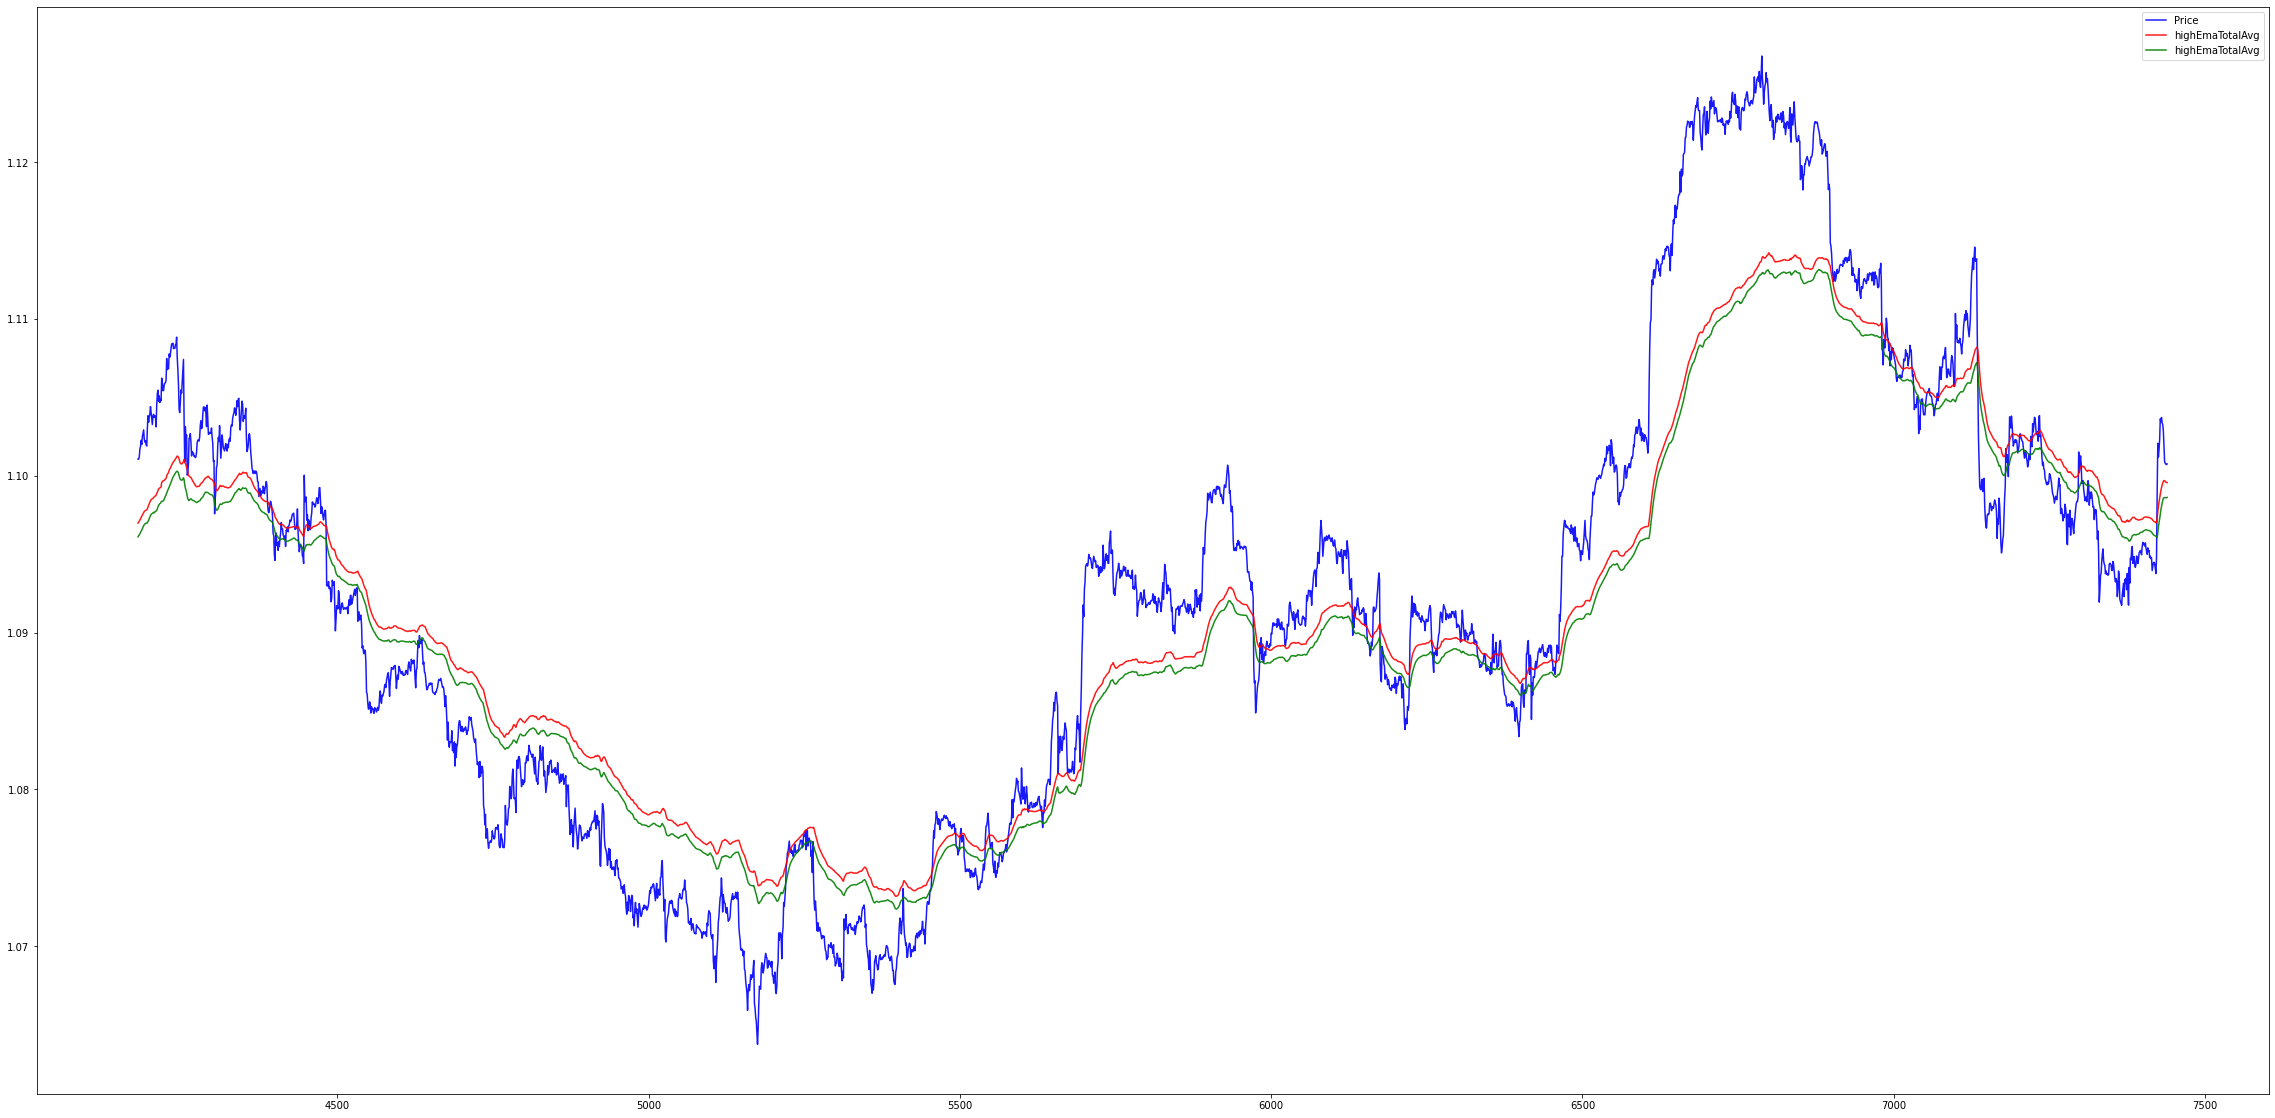

In [85]:



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

## Plotting the SMAs
plt.plot(df['highEmaTotalAvg'], label='highEmaTotalAvg', c='red', alpha=0.9)
plt.plot(df['lowEmaTotalAvg'], label='highEmaTotalAvg', c='green', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



